# 🩺 Problem Statement: Predicting Diabetes Using Medical Data
**This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The primary objective is to predict whether a patient has diabetes based on diagnostic measurements.**

## 📌 Key Details:

**All patients are females aged 21 or older**

**Individuals are of Pima Indian heritage**

**The dataset was curated from a larger medical database under specific constraints**

## 🧪 Dataset Overview
**The dataset contains:**

**Independent Variables:** Several medical predictor features (e.g., glucose levels, BMI, insulin, etc.)

## Target Variable:

**Outcome →**

1: Diabetic

0: Non-diabetic

Our goal is to use machine learning to build a diagnostic model that accurately classifies patients as diabetic or not, based on these health indicators. 🧬📊

# 📦 Importing the Dependencies
## Before diving into the data, let’s load all the essential Python libraries we’ll need for:

**Data manipulation (pandas, numpy) 🧮**

**Visualization (matplotlib, seaborn) 📊**

**Model building and evaluation (sklearn) 🤖**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,
    make_scorer
)
from matplotlib.colors import ListedColormap

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# 📥 Data Loading
## We’ll start by loading the dataset into a DataFrame to begin exploring its structure and content.
**Let’s see what we’re working with! 🧐**

In [2]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# NUMBER OF ROWS AND COLUMNS IN THIS DATASET
print(f"Number of rows and columns: {data.shape}")

Number of rows and columns: (768, 9)


In [5]:
# GETTING STATSITCAL MEASURES OF THE DATA
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# ⚠️ Handling Invalid or Outlier Values
## While exploring the dataset, we notice that some medical features like:

**🩸 Glucose**

**💓 Blood Pressure**

**📏 Skin Thickness**

**💉 Insulin**

**⚖️ BMI (Body Mass Index)**

have entries with a value of **0**.

## 🔎 Why is this a problem?
**These values are physiologically impossible — a person can't have 0 glucose or BMI! Hence, these are likely missing values or outliers due to data entry errors.**

In [6]:
columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
data = data[(data[columns_to_check] != 0).all(axis=1)]

# **Exploratory Data Analysis**

## UNIVARIATE ANALYSIS

## 📉 Filtering Unrealistic Maximum Values

While exploring the dataset, we noticed that some features contain abnormally high values that may not be realistic or medically plausible. These could be due to data entry errors or sensor malfunctions.

### 🔍 Examples of Suspected Outliers:

| Feature        | Observed Max | Reasonable Max | Comment                                                       |
|----------------|--------------|----------------|---------------------------------------------------------------|
| Pregnancies    | 17           | 12             | Rare cases above 12 are extremely uncommon                    |
| Skin Thickness | 99           | 50             | 99 mm is unlikely for skin fold thickness                     |
| Insulin        | 846          | 500            | Extremely high insulin suggests error                         |
| BMI            | 67.1         | 50             | Over 50 is considered morbidly obese and rare                 |
| Age            | 81           | 65             | Most entries are younger; 81 is a statistical outlier         |


In [7]:
max_values = {
    'Pregnancies': 12,
    'SkinThickness': 50,
    'Insulin': 500,
    'BMI': 50,
    'Age': 65
}

# Cap the values
for column, max_val in max_values.items():
    data[column] = data[column].clip(upper=max_val)

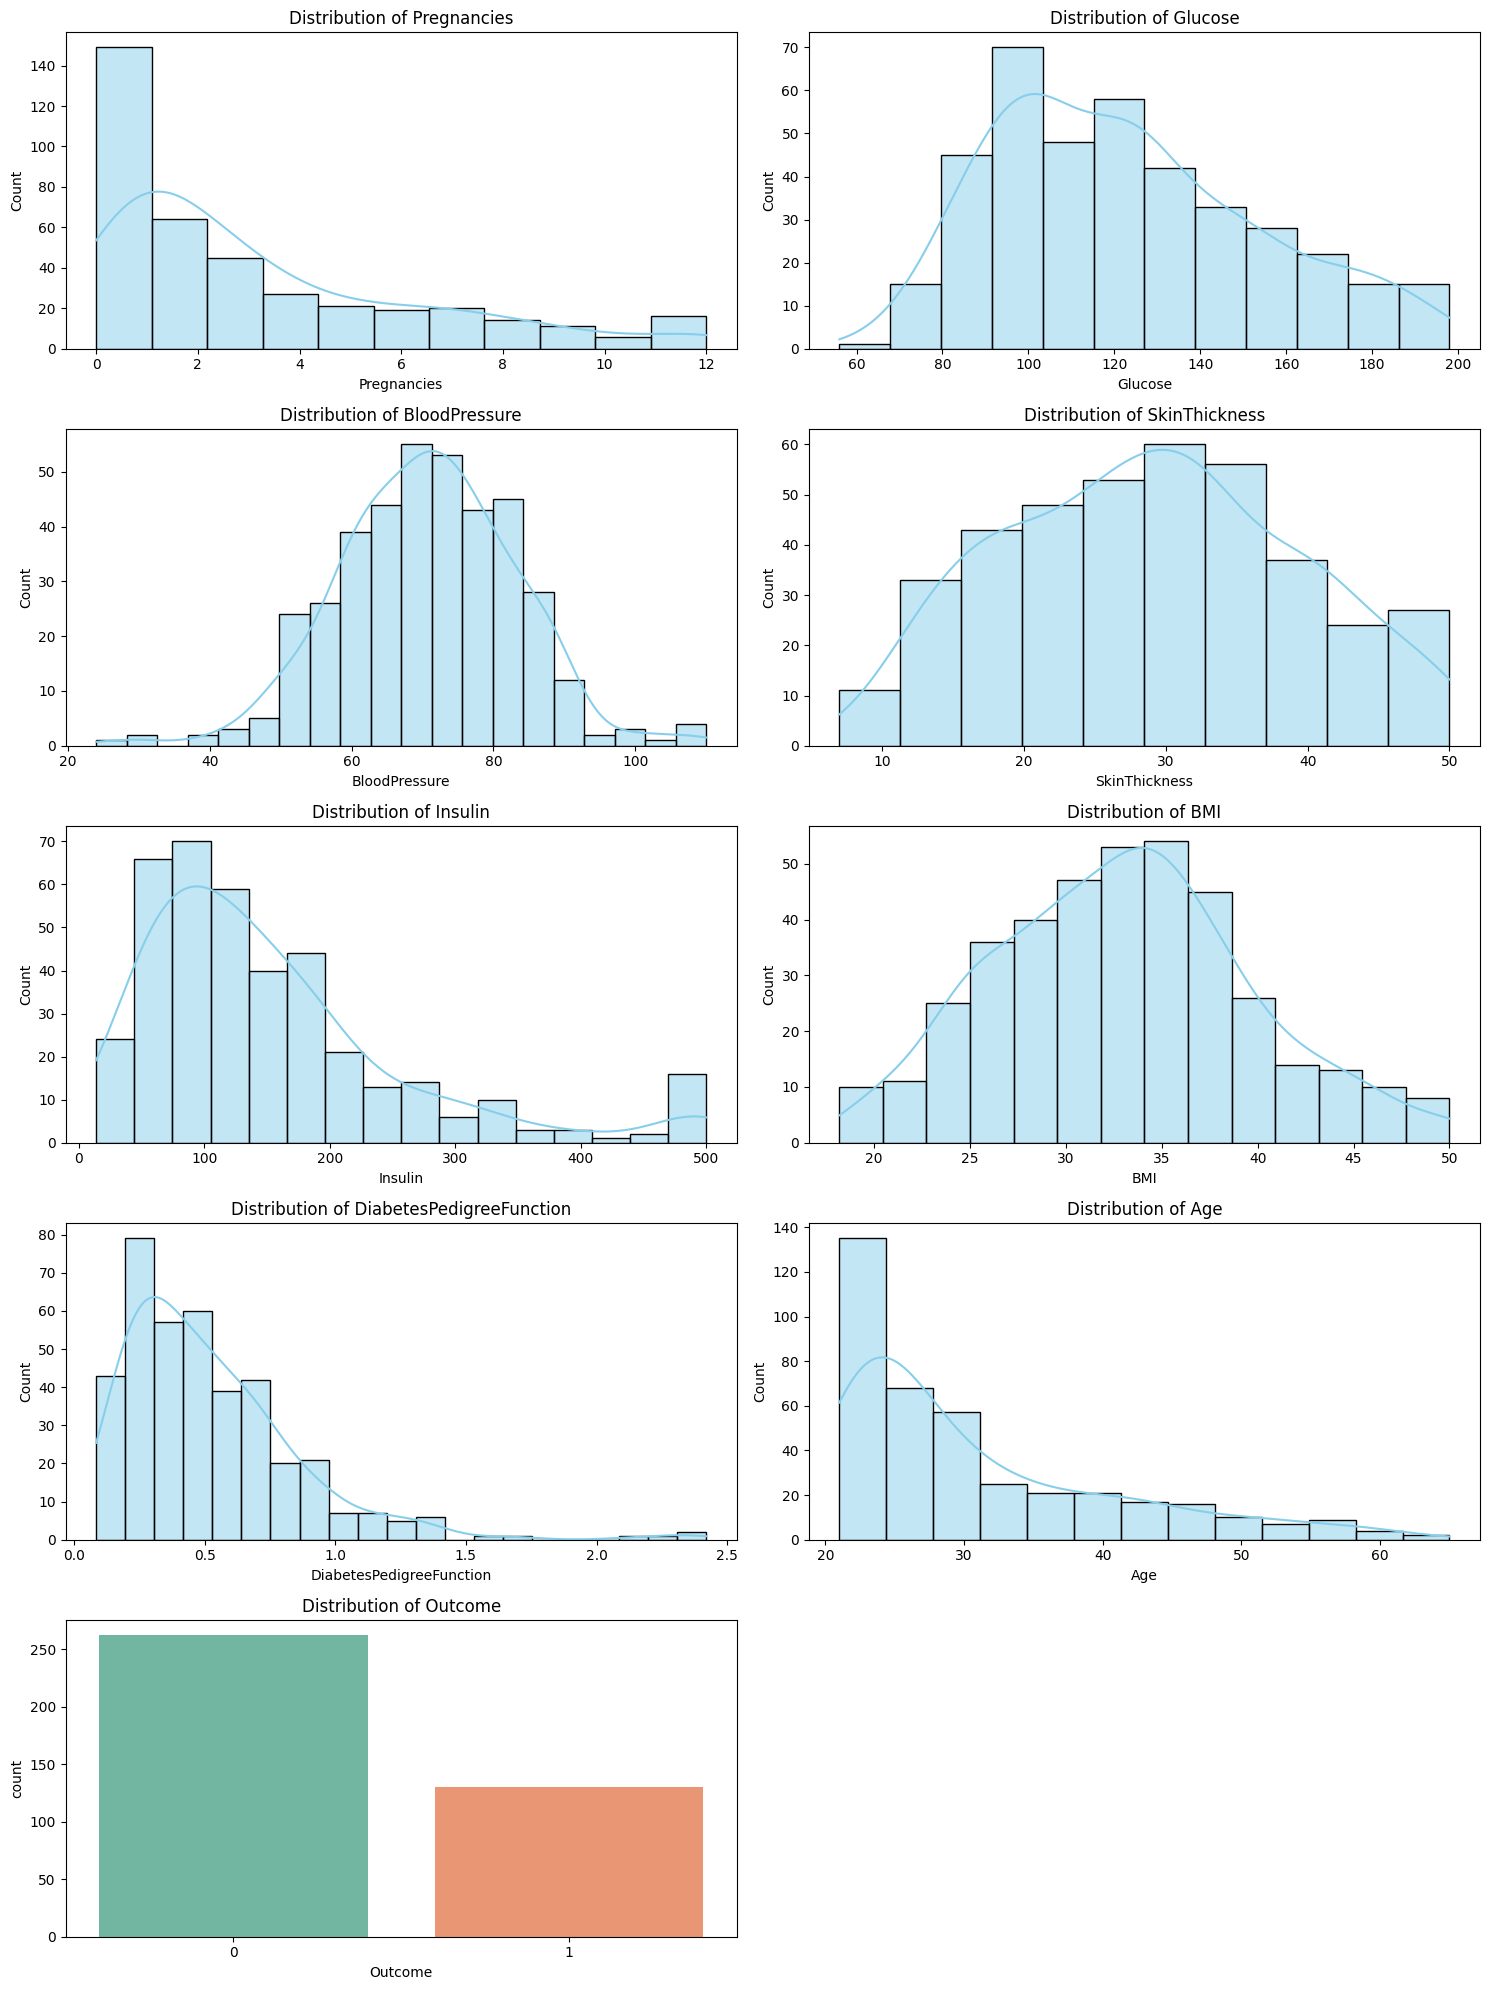

In [8]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(data.columns):
    plt.subplot(5, 2, i+1)
    if column == 'Outcome':
        sns.countplot(x=column, data=data, palette='Set2')
    else:
        sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# 🧪 Medical Features:

- **Pregnancies:** Positively skewed with most women having 0–6 pregnancies. Higher counts are rare but present.

- **Glucose:** Shows a right-skewed distribution, peaking around 100–120. Some very high values near 200 could be outliers.

- **Blood Pressure:** Roughly bell-shaped (Gaussian), centered around 70–80 mmHg.

- **Skin Thickness:** Fairly uniform between 10–50 mm, with some abnormal peaks near 0, indicating possible missing values.

- **Insulin:** Highly skewed right — most values are below 200, but there are extreme values reaching up to 500+, signaling outliers.

- **BMI:** Approximates a normal distribution centered around 30–35, but values above 50 might be questionable.

- **Diabetes Pedigree Function:** Right-skewed, most values fall below 1. High values >2 are rare and may need checking.

- **Age:** Strongly right-skewed. Majority are in their 20s–30s, with a steep drop beyond age 50.


In [9]:
columns_to_iqr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def clip_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if column in max_values:
            upper_bound = min(upper_bound, max_values[column])
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

data = clip_outliers(data.copy(), columns_to_iqr)

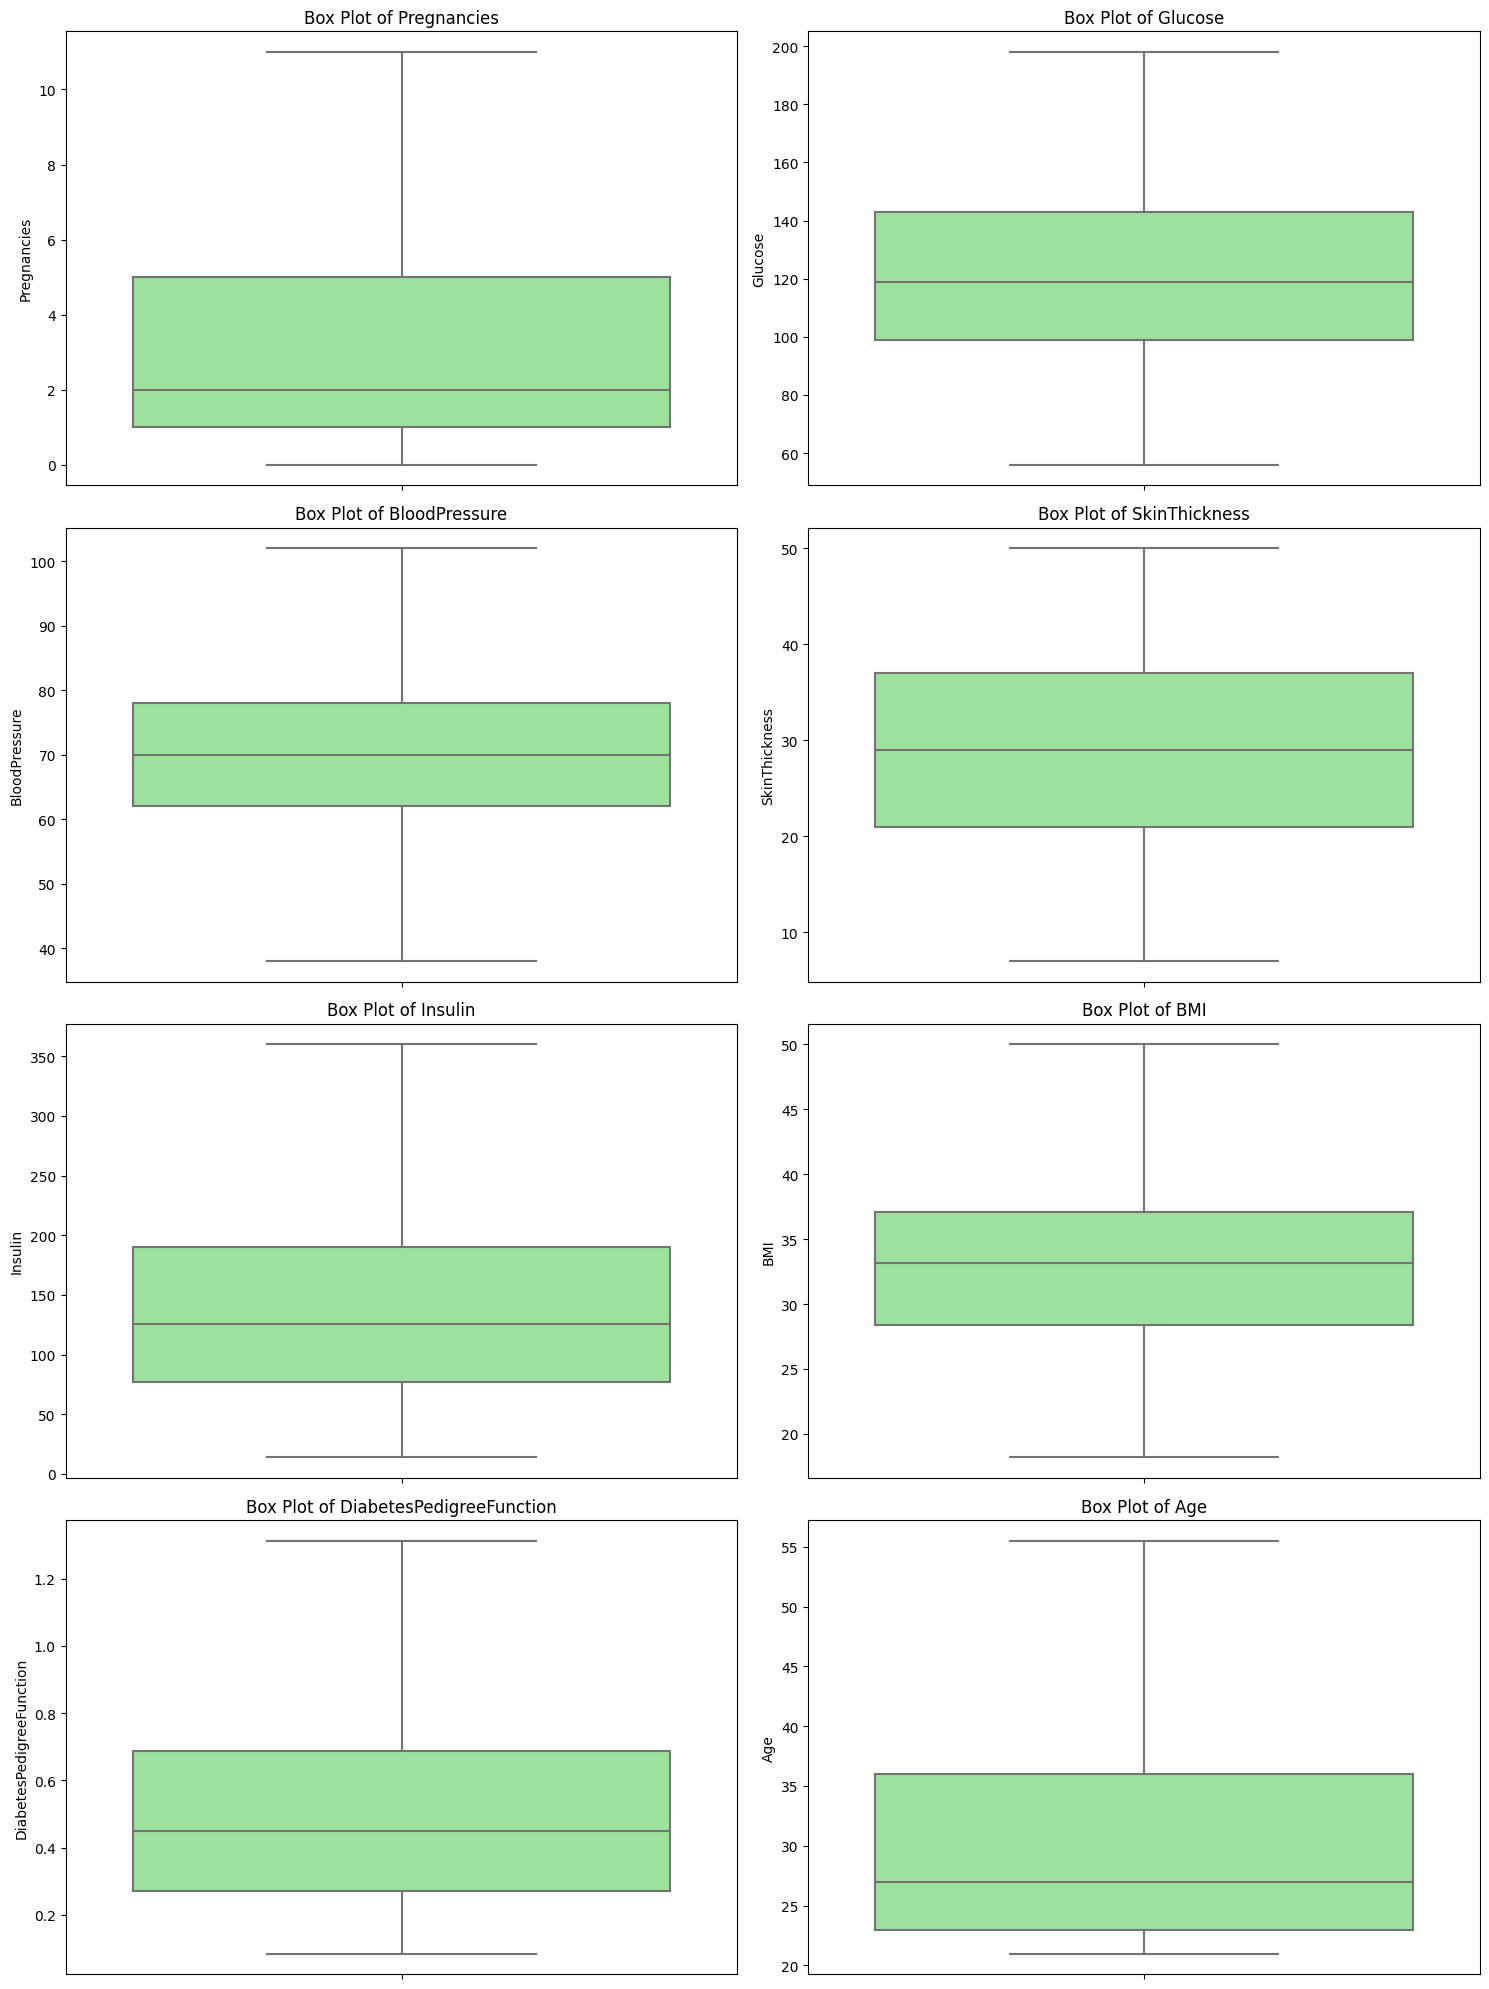

In [10]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(data.columns[:-1]):  # Skip 'Outcome' for boxplot
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=column, data=data, color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

# 📦 Box Plot Analysis of Features

The box plots above provide a visual summary of the central tendency, dispersion, and presence of outliers in each feature of the dataset. Here's a breakdown of insights from each plot:

## 🧪 Feature Insights:

**Pregnancies:**
- Mostly between 0 and 6.
- Few noticeable outliers beyond 10, possibly indicating data errors or rare cases.

**Glucose:**
- Interquartile range (IQR) is well-defined between ~100–140.
- Some values are close to the upper whisker (~200), suggesting mild outliers that may represent extreme diabetic conditions.

**Blood Pressure:**
- Centralized around 70–80 mmHg.
- A few low-end outliers below 50 may represent missing or imputed values.

**Skin Thickness:**
- Values spread mostly between 20–40.
- Minimum values near 0 highlight potential missing entries encoded as zeros.

**Insulin:**
- Broad range with several outliers above 250.
- Some extremely low values (approaching 0) likely indicate missing or unrecorded data.

**BMI:**
- Normally distributed around 30–35.
- Some values above 45 could be anomalous or obese cases, and zeros again could indicate invalid entries.

**Diabetes Pedigree Function:**
- Most data lies within a narrow range (0.2–0.6).
- A few outliers exist beyond 1.0, which may need normalization.

**Age:**
- IQR from about 22 to 37 years.
- Whiskers extend to early 50s with few mild outliers approaching 60+.


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.239796,122.627551,70.678571,29.058673,146.915497,32.973214,0.510568,30.700255,0.331633
std,3.027352,30.860781,12.085321,10.303285,90.206503,6.657985,0.298082,9.685334,0.471401
min,0.000000,56.000000,38.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,11.000000,198.000000,102.000000,50.000000,359.875000,50.000000,1.312875,55.500000,1.000000


# 📊 Dataset Summary at a Glance
## Here's a quick overview of our dataset's numerical features:

**👶 Pregnancies range from 0 to 11 with an average of ~3.24**

**🍬 Glucose levels go from 56 to 198, averaging around 122.6**

**💓 Blood Pressure ranges between 38 and 102, with a mean of ~70.7**

**📏 Skin Thickness varies from 7 to 50, with an average of ~29.1**

**🧪 Insulin levels range from 14 to 359.9, averaging ~146.9**

**⚖️ BMI spans from 18.2 to 50, with a mean of ~33.0**

**👨‍👩‍👧‍👦 Diabetes Pedigree Function (hereditary risk) ranges from 0.085 to 1.31**

**🎂 Age ranges from 21 to 55.5, with an average of ~30.7**

**🩺 Outcome (diabetes presence) is a binary label (0 or 1)**

In [12]:
data["Outcome"].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

# 🩺 Diabetes Outcome Distribution
## The dataset consists of 392 individuals, categorized based on whether they have diabetes:

**✅ No Diabetes (0): 262 individuals**

**⚠️ Diabetes (1): 130 individuals**

This shows a **mild class imbalance**
We might consider techniques like SMOTE or class weighting to address this during model training. ⚖️

## BIVARIATE ANALYSIS

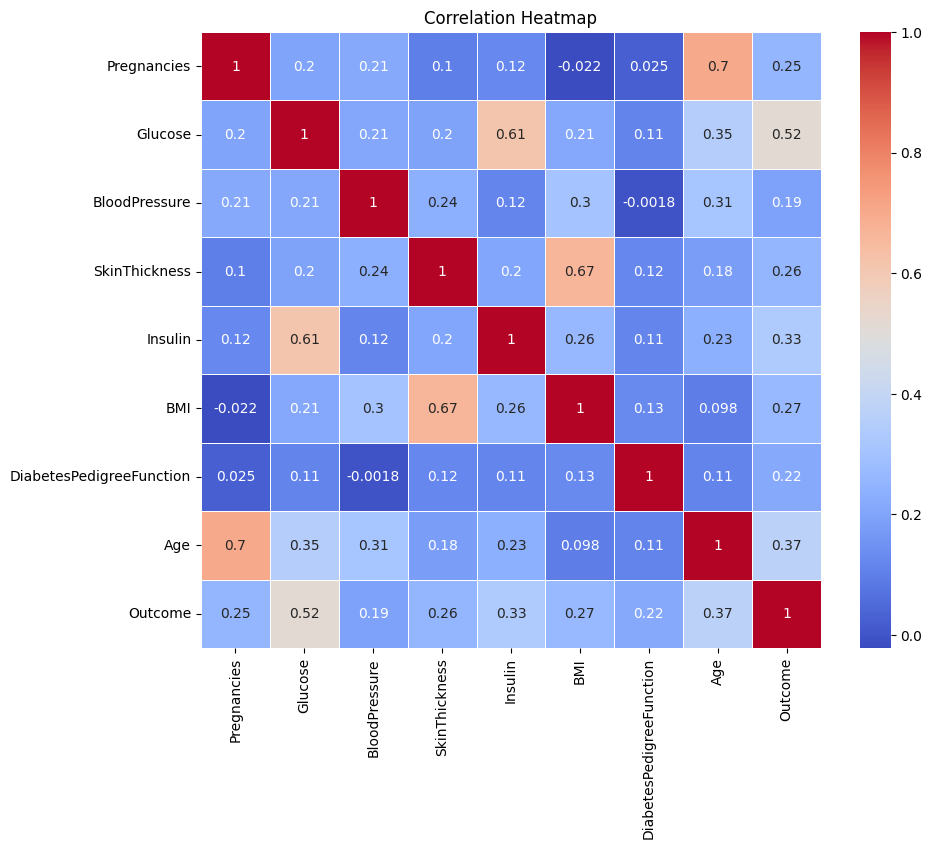

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

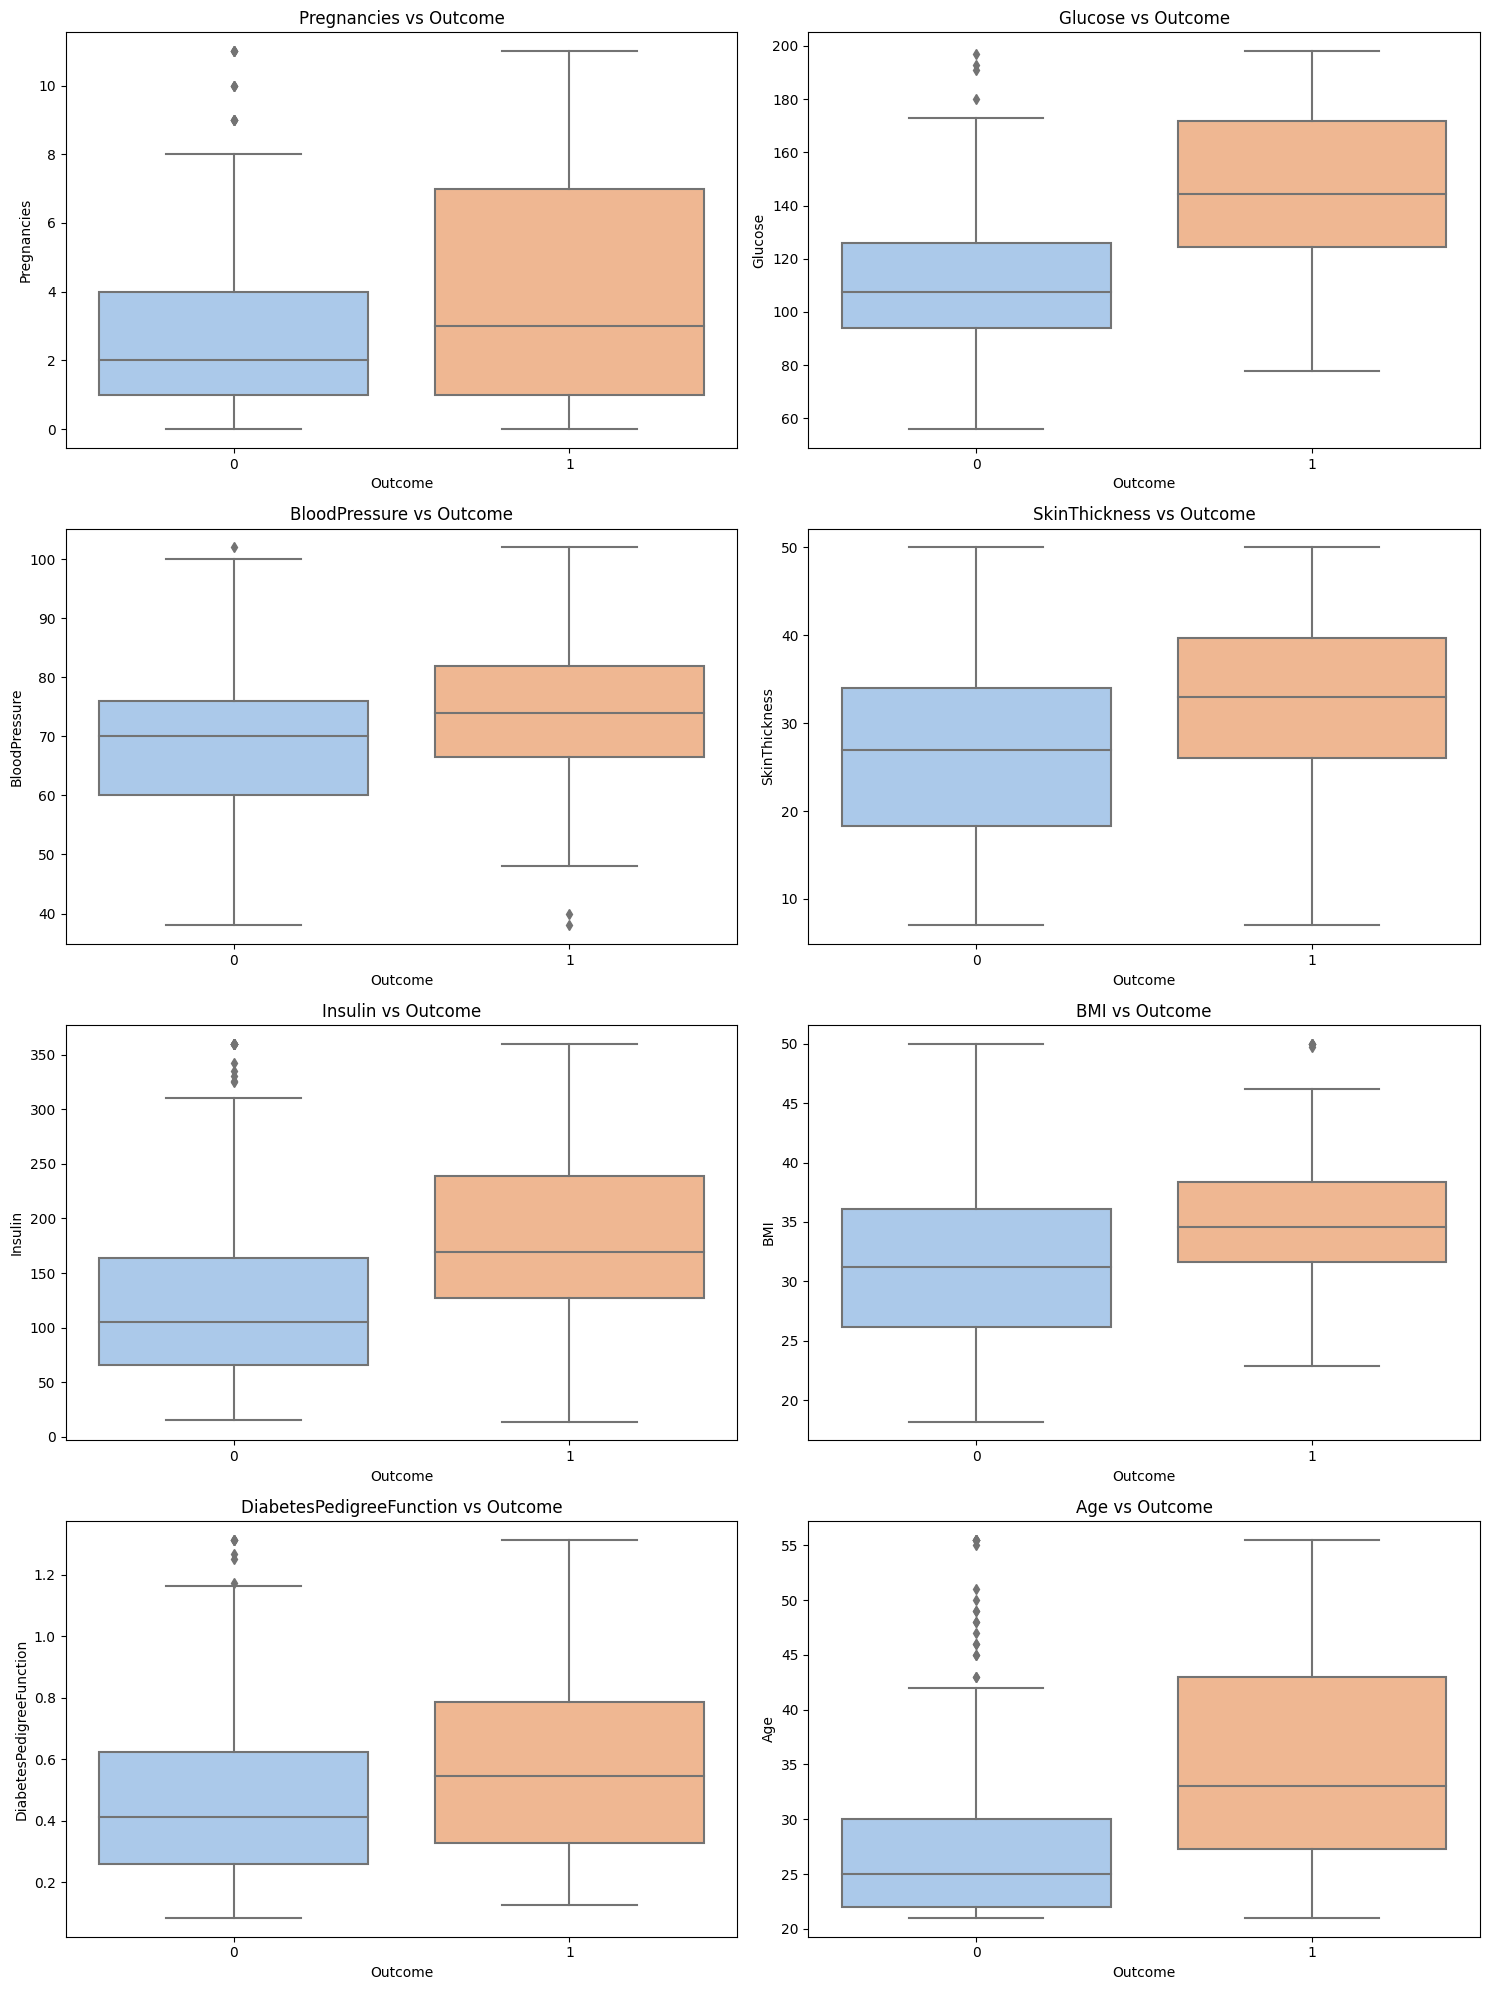

In [14]:
# Boxplots: Outcome vs other features
features = data.columns[:-1]  # Exclude Outcome itself

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Outcome', y=feature, data=data, palette='pastel')
    plt.title(f'{feature} vs Outcome')
    plt.tight_layout()

plt.show()

# 📊 Feature Distribution by Diabetes Outcome

The box plots above depict how the distribution of each feature varies between the two outcome classes:

- **Outcome = 0**: Non-diabetic  
- **Outcome = 1**: Diabetic  

This comparative visualization provides critical insights into which features are influential in predicting diabetes.

---

## 💡 Key Observations:

### **Pregnancies vs Outcome**
- Diabetic patients tend to have a higher median number of pregnancies compared to non-diabetic patients.
- The distribution is more spread out for Outcome = 1, indicating a possible correlation.

### **Glucose vs Outcome**
- Glucose levels are significantly higher in diabetic patients, with a clear shift in the median.
- This makes Glucose one of the most distinguishing features for the outcome.

### **Blood Pressure vs Outcome**
- Both groups have similar medians.
- However, diabetic patients exhibit a slightly broader range and more variability.

### **Skin Thickness vs Outcome**
- A slight upward shift in median for diabetic patients.
- Not a very strong separation but could contribute when combined with other features.

### **Insulin vs Outcome**
- Diabetic patients have a noticeably higher median insulin level.
- Some overlap exists, but outliers are more frequent among non-diabetic individuals.

### **BMI vs Outcome**
- Diabetic individuals generally have a higher BMI.
- This indicates obesity is positively associated with diabetes in the dataset.

### **Diabetes Pedigree Function vs Outcome**
- Diabetic patients tend to have slightly higher values, suggesting family history or genetic risk is a factor.

### **Age vs Outcome**
- Diabetic patients are, on average, older, with a higher median and wider spread.
- A visible number of older individuals are associated with a positive outcome.


# **SEPARATING THE DATA AND LABELS**

In [15]:
# SEPARATING THE DATA AND LABELS
X = data.drop('Outcome',axis=1)
y = data['Outcome']

# 🧪 Separating Features & Labels
## We now split our dataset into:

**✅ Features (X) – all columns except Outcome**

**🎯 Target (y) – the Outcome column which tells us if a person is diabetic or not**

**This separation is essential for training our model properly.**

# Data Standardization
# 📏 Why Standardization is Important?
## Our dataset contains features with different ranges of values. For example:

**🍼 Pregnancies range from 0 to 17**

**🍬 Glucose levels range from 0 to 199**

This difference in scale can confuse machine learning models, especially those that rely on distance calculations (like KNN or SVM). Even though 199 is only about **3x larger** than 60, it can still dominate other features and negatively impact model performance. 😬

👉 To solve this, we apply standardization – a technique that scales the data so each feature contributes equally during training.

✅ This helps our model train better and make more accurate predictions! 🚀

In [16]:
scaler = StandardScaler()

In [17]:
X = scaler.fit_transform(X)

# 🧠 Model Training
## Let’s now build a reusable function to:

**🧪 Split data into train and test sets**

**📚 Train the model**

**📈 Evaluate it using accuracy, precision, recall, F1-score**

**🔲 Visualize the performance using a confusion matrix**

**This makes it easier to test and compare different models! 💡**

In [18]:
def train_model(model, X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {round(train_acc * 100, 2)}%")
    print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

    # Evaluation
    print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
    print("Precision:", round(precision_score(y_test, y_test_pred, average='weighted') * 100, 2), "%")
    print("Recall:", round(recall_score(y_test, y_test_pred, average='weighted') * 100, 2), "%")
    print("F1 Score:", round(f1_score(y_test, y_test_pred, average='weighted') * 100, 2), "%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# 🧬 Training the SVM Classifier
## We start by training a Support Vector Machine (SVM) with:

**⚙️ linear kernel — simple and interpretable**

**⚖️ class_weight to handle class imbalance**

**Let’s see how well it performs in detecting diabetes! 📊**

Training Accuracy: 79.87%
Test Accuracy: 78.48%

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        53
           1       0.65      0.77      0.70        26

    accuracy                           0.78        79
   macro avg       0.76      0.78      0.77        79
weighted avg       0.80      0.78      0.79        79

Precision: 79.94 %
Recall: 78.48 %
F1 Score: 78.89 %


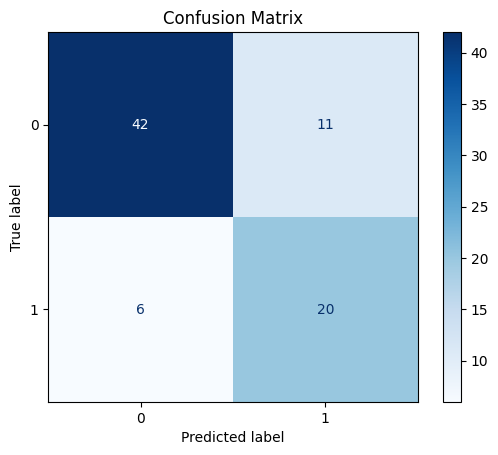

In [19]:
model = SVC(kernel='linear',class_weight = {0:3,1:5})
train_model(model, X,y)

# 🧠 Model Evaluation Framework with Sampling Support
## To streamline model training and evaluation, we define a custom class SamplerModel that:

**🔁 Handles class imbalance using samplers (like SMOTE, RandomUnderSampler, etc.)**<br>
**📚 Trains multiple models (Logistic Regression, Random Forest, SVC, Decision Tree)**<br>
**📈 Evaluates performance using accuracy, precision, recall, F1-score**<br>
**🔳 Displays confusion matrices for visual performance comparison**<br>

# 🧩 Class: SamplerModel
## 🔧 __init__
**Initializes with a sampling strategy (self.sampler)**

**Stores features (X) and labels (y)**

**Defines a set of classifiers to evaluate**

## 🧪 apply_sampler()
**Applies the given sampler to balance the dataset**

**Returns the resampled X and y**

## 🚀 train_and_evaluate_all()
**Resamples data**

**Splits into train and test sets**

**Trains all models**

**Computes and stores:**

**✅ Accuracy**

**🧠 Precision**

**📢 Recall**

**🎯 F1 Score**

**🧾 Confusion Matrix**

**🔍 plot_confusion_matrix()**
**Nicely plots confusion matrix using matplotlib and sklearn**

In [20]:
class SamplerModel:
    def __init__(self, sampler, X, y):
        self.sampler = sampler
        self.X = X
        self.y = y
        self.X_test = None
        self.y_test = None
        self.y_test_pred = None

        # Static model list
        self.models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Random Forest": RandomForestClassifier(random_state=42),
            "SVC (Linear)": SVC(kernel='linear', probability=True),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
        }

    def apply_sampler(self):
        X_resampled, y_resampled = self.sampler.fit_resample(self.X, self.y)
        return X_resampled, y_resampled

    def train_and_evaluate_all(self):
        X_resampled, y_resampled = self.apply_sampler()

        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, y_resampled, test_size=0.2, random_state=42
        )

        results = {}

        for name, model in self.models.items():
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            results[name] = {
                "Accuracy": round(acc * 100, 2),
                "Precision": round(precision * 100, 2),
                "Recall": round(recall * 100, 2),
                "F1 Score": round(f1 * 100, 2),
                "Confusion Matrix": confusion_matrix(y_test, y_pred)
            }

        return results

    def plot_confusion_matrix(self, cm, title="Confusion Matrix"):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(title)
        plt.show()


# 🧪 Running Models with Random Over Sampler (ROS)
## To address the class imbalance in our dataset, we use:

**🔁 Random Over Sampling – it duplicates minority class samples to balance the classes. This helps models learn more effectively without being biased toward the majority class.**

**We then initialize and run our SamplerModel using this sampler:**


🔹 Logistic Regression
Accuracy: 78.1%
Precision: 79.24%
Recall: 78.1%
F1 Score: 78.32%


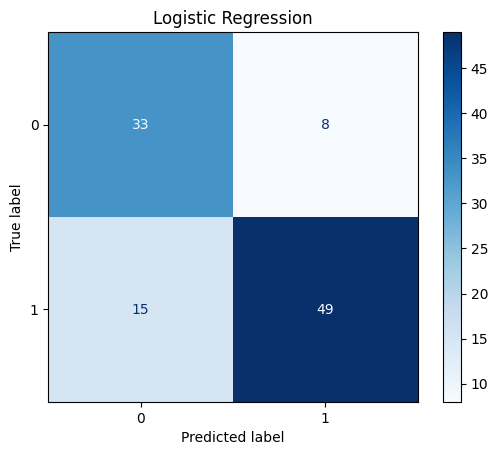


🔹 Random Forest
Accuracy: 92.38%
Precision: 92.79%
Recall: 92.38%
F1 Score: 92.25%


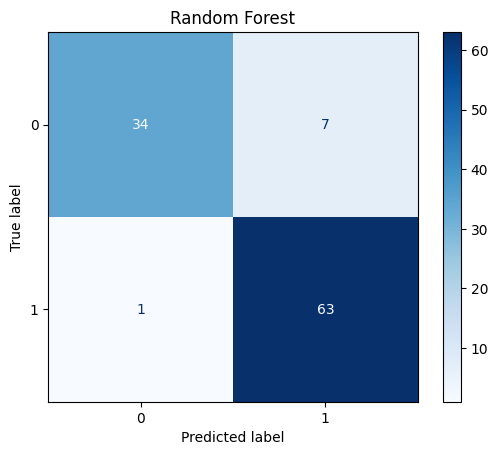


🔹 SVC (Linear)
Accuracy: 79.05%
Precision: 80.43%
Recall: 79.05%
F1 Score: 79.28%


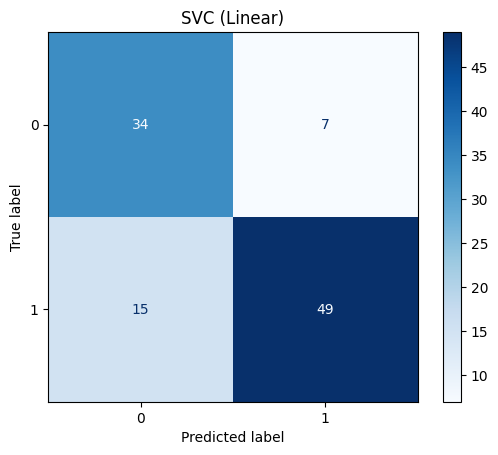


🔹 Decision Tree
Accuracy: 92.38%
Precision: 92.51%
Recall: 92.38%
F1 Score: 92.3%


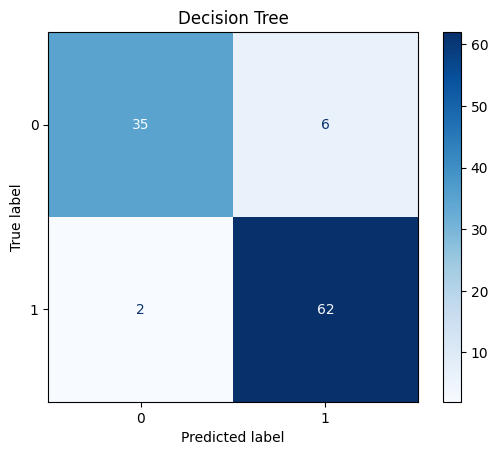

In [21]:
ros = RandomOverSampler(random_state=2)
model_run = SamplerModel(ros, X, y)
results = model_run.train_and_evaluate_all()

for model_name, metrics in results.items():
    print(f"\n🔹 {model_name}")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"{metric_name}: {value}%")
    model_run.plot_confusion_matrix(metrics["Confusion Matrix"], title=model_name)

# ⚡ Model Evaluation with SMOTE (Synthetic Minority Oversampling Technique)
**Now we apply SMOTE, which generates synthetic examples for the minority class instead of simply duplicating them. This often leads to better generalization and performance compared to Random Oversampling. 🎯**


🔹 Logistic Regression
Accuracy: 73.33%
Precision: 76.56%
Recall: 73.33%
F1 Score: 73.64%


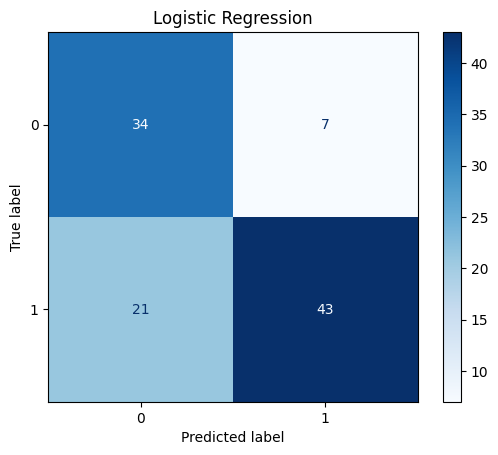


🔹 Random Forest
Accuracy: 86.67%
Precision: 87.11%
Recall: 86.67%
F1 Score: 86.76%


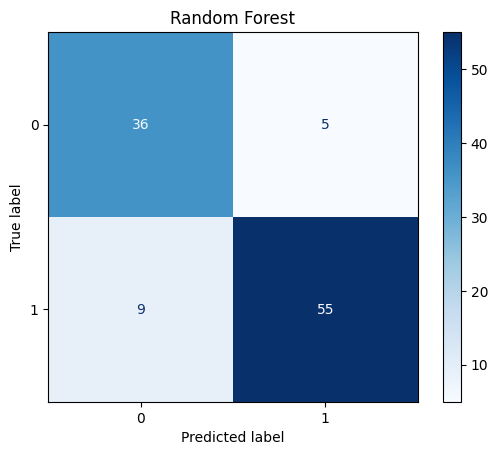


🔹 SVC (Linear)
Accuracy: 72.38%
Precision: 75.95%
Recall: 72.38%
F1 Score: 72.68%


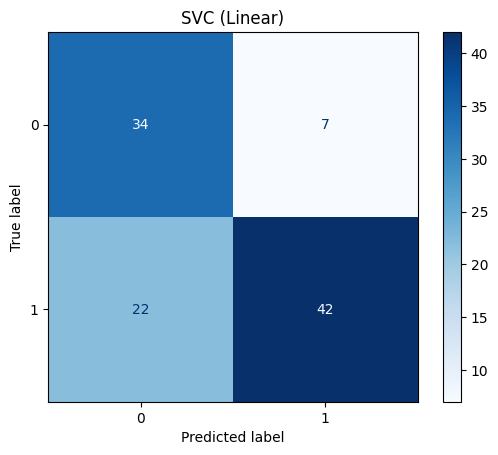


🔹 Decision Tree
Accuracy: 76.19%
Precision: 77.86%
Recall: 76.19%
F1 Score: 76.47%


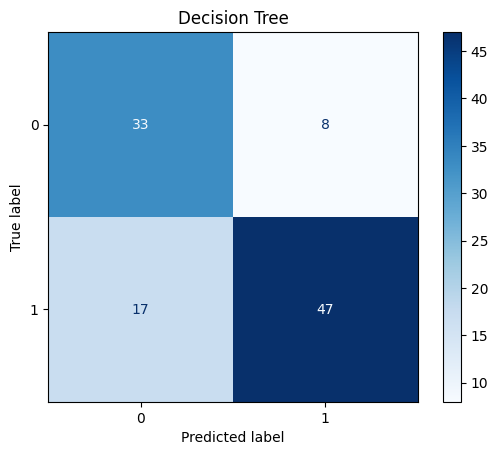

In [22]:
smote = SMOTE(random_state=2)
model_run = SamplerModel(smote, X, y)
results = model_run.train_and_evaluate_all()

for model_name, metrics in results.items():
    print(f"\n🔹 {model_name}")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"{metric_name}: {value}%")
    model_run.plot_confusion_matrix(metrics["Confusion Matrix"], title=model_name)

# 🌟 Random Forest with OverSampling Shines Bright!
**Among all the models evaluated using oversampling techniques, Random Forest consistently delivered the best performance. Whether using Random Over Sampling (ROS) or SMOTE, it outperformed other classifiers in terms of accuracy, precision, recall, and F1-score. 🌲🔥**

**Random Forest’s strength lies in its ensemble learning approach, where multiple decision trees work together to make robust predictions. When combined with oversampling, the model gets a balanced view of both classes, allowing it to detect diabetic cases more effectively without being biased toward the majority class.**

## 📊 Conclusion:
**👉 Oversampling helps balance the dataset**<br>
**👉 Random Forest leverages that balance to produce highly reliable results**<br>
**👉 It's an ideal choice for medical predictions like diabetes detection 💉🧠**

In [23]:
ros = RandomOverSampler(random_state=2)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [24]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_model.predict(X_test_ros)
acc = accuracy_score(y_test_ros, y_pred)
precision = precision_score(y_test_ros, y_pred, average='weighted')
recall = recall_score(y_test_ros, y_pred, average='weighted')
f1 = f1_score(y_test_ros, y_pred, average='weighted')

In [27]:
results = {
"Accuracy": round(acc * 100, 2),
"Precision": round(precision * 100, 2),                
"Recall": round(recall * 100, 2),
"F1 Score": round(f1 * 100, 2),
"Confusion Matrix": confusion_matrix(y_test_ros, y_pred)
}

In [28]:
results

{'Accuracy': 92.38,
 'Precision': 92.79,
 'Recall': 92.38,
 'F1 Score': 92.25,
 'Confusion Matrix': array([[34,  7],
        [ 1, 63]])}

In [29]:
# 4. Save the model
import joblib
joblib.dump(rf_model, "ros_rf_model.pkl")

['ros_rf_model.pkl']

In [30]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']